# Unit 1 Capstone: Narrative analytics and experimentation

Unit 1 / Lesson 5 / Project 1

Previously we've asked you to look into a dataset to ask and answer a series of questions.
You are now ready for the next step in that process.

As usual, it starts with picking a data set.
It can be the same data set as a previous challenge or capstone, but make sure you're using a data set that makes sense for this task, so read all of the instructions first.

First, dive in and explore the data set.
Include your code and visuals from this process in your final write up.
While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.

The main component of this capstone is a research proposal.
Using the data set you selected, propose and outline an experiment plan.

The plan should consist of three key components:
- Analysis that highlights your experimental hypothesis.
- A rollout plan showing how you would implement and rollout the experiment
- An evaluation plan showing what constitutes success in this experiment

Your experiment should be as real as possible.
Though you obviously will not have access to the full production environment to deploy your experiment, it should be feasible and of interest to the parties involved with your actual data source.

# Understanding Risk and Return

Now that we have our very first trillion dollar company, what's next?

According to this article from [CNBC](https://www.cnbc.com/2018/08/03/these-are-the-next-companies-poised-to-hit-1-trillion.html)
We might see more trillion dollar companies in 2019. But is bigger better? Let's take a look at some of the largest companies in the US stock market and compare their performance.

We'll use the article as a jumping off point, and compare the next companies slated to top 1 trillion to Apple, the first trillion dollare company. We'll compare Apple, Amazon, Google, Microsoft, and the S&P 500 for a control.

To compare the securities, we'll look at the rolling 12 month sharpe ratio.
The Sharpe ratio is a comparision of risk and return.
It compares the difference in the average return of an asset and the risk free rate of return, divided by the volatility in the return of the asset.
We'll calculate two Sharpe Ratios, one with the standard risk-free rate of return, and another with the average market return as an analogue for the risk-free rate.
If bigger truly is better, we expect our companies to have a better sharpe ratio than the overall market.

In addition to the Sharpe Ratio, we'll also be able to compare price, volume, volatility, to get a clear picture of the risk of each asset.

We'll have two 12 month Sharpe ratios, the trational using the RFF and another using the market return as RFF.
We have financial data for four companies, similar in size and industry, and our hypothesis is that each assets will have a better Sharpe Ratio than the overall market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data rom alphavantage.co API

#PATH_AAPL = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=K6YQBHF3XYZCR530' # api url
#api_AAPL = pd.read_json(PATH_AAPL)
#api_AAPL.to_json('stock_data_AAPL.json')


#PATH_AMZN = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMZN&outputsize=full&apikey=K6YQBHF3XYZCR530' # api url
#api_AMZN = pd.read_json(PATH_AMZN)
#api_AMZN.to_json('stock_data_AMZN.json')


#PATH_GOOGL = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOOGL&outputsize=full&apikey=K6YQBHF3XYZCR530' # api url
#api_GOOGL = pd.read_json(PATH_GOOGL)
#api_GOOGL.to_json('stock_data_GOOGL.json')


#PATH_MSFT = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=K6YQBHF3XYZCR530' # api url
#api_MSFT = pd.read_json(PATH_MSFT)
#api_MSFT.to_json('stock_data_MSFT.json')


#PATH_SPX = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPX&outputsize=full&apikey=K6YQBHF3XYZCR530' # api url
#api_SPX = pd.read_json(PATH_SPX)
#api_SPX.to_json('stock_data_SPX.json')


#PATH_TBILL = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TLH&outputsize=full&apikey=K6YQBHF3XYZCR530' # api url
#api_TBILL = pd.read_json(PATH_TBILL)
#api_TBILL.to_json('stock_data_TBILL.json')


#api_AAPL.head()
#api_AMZN.head()
#api_GOOGL.head()
#api_MSFT.head()
#api_SPX.head()
#api_TBILL.head()

In [3]:
aapl = pd.read_json('stock_data_AAPL.json')

# view data
aapl.head()

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",None
1998-01-02,None,"{'1. open': '13.6300', '2. high': '16.2500', '..."
1998-01-05,None,"{'1. open': '16.5000', '2. high': '16.5600', '..."
1998-01-06,None,"{'1. open': '15.9400', '2. high': '20.0000', '..."
1998-01-07,None,"{'1. open': '18.8100', '2. high': '19.0000', '..."


In [4]:
# Clean up the data

# create a list of new column names
Columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# clean up column names
aapl['daily'] = aapl['Time Series (Daily)']

# drop unused rows/columns
aapl = aapl.drop('Meta Data', 1)
aapl = aapl.drop('Time Series (Daily)', 1)
aapl = aapl.drop(aapl.index[0])
aapl = aapl.drop(aapl.index[[-3,-2,-1]])

# convert dict to pd.Series
aapl = aapl.daily.apply(pd.Series)

# rename columns
aapl.columns=Columns
aapl.index.name='AAPL'

# convert index to datatime
aapl.index = pd.to_datetime(aapl.index, errors='coerce')

# reset index
aapl = aapl['2007-01-11':]

# convert columns to numeric
cols = aapl.columns
aapl[cols] = aapl[cols].apply(pd.to_numeric, errors='coerce')

# calculate return over time
aapl['Return'] = aapl.Close / aapl.Close.iloc[0]

# view clean data
aapl.tail()
aapl.head()

,Open,High,Low,Close,Volume,Return
AAPL,,,,,,
2007-01-11,95.94,96.78,95.10,95.80,51437600,1.000000
2007-01-12,94.59,95.06,93.23,94.62,46881800,0.987683
2007-01-16,95.68,97.25,95.45,97.10,44431300,1.013570
2007-01-17,97.56,97.60,94.82,94.95,58795000,0.991127
2007-01-18,92.10,92.11,89.05,89.07,84450200,0.929749


In [5]:
# repeat cleaning process
amzn = pd.read_json('stock_data_AMZN.json')

amzn['daily'] = amzn['Time Series (Daily)']

amzn = amzn.drop('Meta Data', 1)
amzn = amzn.drop('Time Series (Daily)', 1)
amzn = amzn.drop(amzn.index[0])
amzn = amzn.drop(amzn.index[[-3,-2,-1]])

amzn = amzn.daily.apply(pd.Series)

amzn.columns=Columns
amzn.index.name='AMZN'

amzn.index = pd.to_datetime(amzn.index, errors='coerce')

# reset index
amzn = amzn['2007-01-11':]

cols = amzn.columns
amzn[cols] = amzn[cols].apply(pd.to_numeric, errors='coerce')

amzn['Return'] = amzn.Close / amzn.Close.iloc[0]


amzn.tail()
amzn.head()

,Open,High,Low,Close,Volume,Return
AMZN,,,,,,
2007-01-11,37.17,38.00,37.17,37.40,6465600,1.000000
2007-01-12,37.36,38.21,37.27,38.20,4466400,1.021390
2007-01-16,38.40,38.89,37.97,38.66,5643700,1.033690
2007-01-17,38.70,39.00,37.78,37.88,5026800,1.012834
2007-01-18,37.50,37.65,36.72,36.98,9105000,0.988770


In [6]:
# repeat cleaning process
googl = pd.read_json('stock_data_GOOGL.json')

googl['daily'] = googl['Time Series (Daily)']

googl = googl.drop('Meta Data', 1)
googl = googl.drop('Time Series (Daily)', 1)
googl = googl.drop(googl.index[0:2])
googl = googl.drop(googl.index[[-3,-2,-1]])

googl = googl.daily.apply(pd.Series)

googl.columns=Columns
googl.index.name='GOOGL'

googl.index = pd.to_datetime(googl.index, errors='coerce')

# reset index
googl = googl['2007-01-11':]

cols = googl.columns
googl[cols] = googl[cols].apply(pd.to_numeric, errors='coerce')

googl['Return'] = googl.Close / googl.Close.iloc[0]


googl.tail()
googl.head()

,Open,High,Low,Close,Volume,Return
GOOGL,,,,,,
2007-01-11,497.200,501.75,496.18,499.72,14401900,1.000000
2007-01-12,501.990,505.00,500.00,505.00,8938400,1.010566
2007-01-16,507.550,513.00,503.30,504.28,15122600,1.009125
2007-01-17,503.395,507.77,494.38,497.28,13384800,0.995117
2007-01-18,494.520,496.48,487.43,487.83,11852100,0.976207


In [7]:
# repeat cleaning process
msft = pd.read_json('stock_data_MSFT.json')

msft['daily'] = msft['Time Series (Daily)']

msft = msft.drop('Meta Data', 1)
msft = msft.drop('Time Series (Daily)', 1)
msft = msft.drop(msft.index[0])
msft = msft.drop(msft.index[[-3,-2,-1]])

msft = msft.daily.apply(pd.Series)

msft.columns=Columns
msft.index.name='MSFT'

msft.index = pd.to_datetime(msft.index, errors='coerce')

# reset index
msft = msft['2007-01-11':]

cols = msft.columns
msft[cols] = msft[cols].apply(pd.to_numeric, errors='coerce')

msft['Return'] = msft.Close / msft.Close.iloc[0]


msft.tail()
msft.head()

,Open,High,Low,Close,Volume,Return
MSFT,,,,,,
2007-01-11,29.76,30.75,29.6499,30.70,99464300,1.000000
2007-01-12,30.65,31.39,30.6400,31.21,103972500,1.016612
2007-01-16,31.26,31.45,31.0300,31.16,62379600,1.014984
2007-01-17,31.26,31.44,31.0100,31.10,58519600,1.013029
2007-01-18,31.15,31.37,30.8000,31.00,56364300,1.009772


In [8]:
# repeat cleaning process
spx = pd.read_json('stock_data_SPX.json')

spx['daily'] = spx['Time Series (Daily)']

spx = spx.drop('Meta Data', 1)
spx = spx.drop('Time Series (Daily)', 1)
spx = spx.drop(spx.index[0:2])
spx = spx.drop(spx.index[[-3,-2,-1]])

spx = spx.daily.apply(pd.Series)

spx.columns=Columns
spx.index.name='SPX'

spx.index = pd.to_datetime(spx.index, errors='coerce')

# reset index
spx = spx['2007-01-11':]

cols = spx.columns
spx[cols] = spx[cols].apply(pd.to_numeric, errors='coerce')

spx['Return'] = spx.Close / spx.Close.iloc[0]


spx.tail()
spx.head()

,Open,High,Low,Close,Volume,Return
SPX,,,,,,
2007-01-11,1414.8400,1427.1200,1414.8400,1423.8199,2857870000,1.000000
2007-01-12,1423.8199,1431.2300,1422.5800,1430.7300,2686480000,1.004853
2007-01-16,1430.7300,1433.9301,1428.6200,1431.9000,2599530000,1.005675
2007-01-17,1431.7700,1435.2700,1428.5699,1430.6200,2690270000,1.004776
2007-01-18,1430.5900,1432.9600,1424.2100,1426.3700,2822430000,1.001791


In [9]:
# repeat cleaning process
tbill = pd.read_json('stock_data_TBILL.json')

tbill['daily'] = tbill['Time Series (Daily)']

tbill = tbill.drop('Meta Data', 1)
tbill = tbill.drop('Time Series (Daily)', 1)
tbill = tbill.drop(tbill.index[0:2])
tbill = tbill.drop(tbill.index[[-3,-2,-1]])

tbill = tbill.daily.apply(pd.Series)

tbill.columns=Columns
tbill.index.name='UST10Y'

tbill.index = pd.to_datetime(tbill.index, errors='coerce')

cols = tbill.columns
tbill[cols] = tbill[cols].apply(pd.to_numeric, errors='coerce')

tbill['Return'] = tbill.Close / tbill.Close.iloc[0]


tbill.tail()

tbill.head()

,Open,High,Low,Close,Volume,Return
UST10Y,,,,,,
2007-01-11,100.38,100.40,100.15,100.40,129700,1.000000
2007-01-12,100.01,100.01,99.90,99.90,700,0.995020
2007-01-16,100.04,100.08,99.97,100.08,2300,0.996813
2007-01-17,100.06,100.06,100.06,100.06,1800,0.996614
2007-01-18,99.83,100.02,99.78,100.02,4400,0.996215


## Exploring Our Data

Now that we have our data loaded, let's take a look at it.
We have price and volume data for each security, so let's plot it and take a look. Changes in volume can be helpful indicators of volatility.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AC2B208>,
      dtype=object)

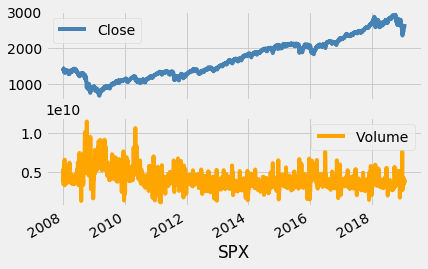

In [10]:
plt.style.use('fivethirtyeight')

spx['2008-01-01':][['Close', 'Volume']].plot(subplots=True, color=['steelblue', 'orange'], figsize=(6,4))

We can see that the price of the S&P 500 has been increasing steadily over the last decade.
This confirms our initial assertion that the US stock market has been experiencing a bull market since 2009.
We should see this manifest itself in the form of low volatility and high price growth.

Let's see if we can get a better look at volatility.

In [11]:
# add volatility columns to each DataFrame

# define func
def vol_col():
    dfs = [aapl, amzn, googl, msft, spx, tbill]
    for df in dfs:
        df['Volatility'] = df.Return.rolling(252).std() * np.sqrt(252)
        
# run
vol_col()

# view DFs
spx.tail()

,Open,High,Low,Close,Volume,Return,Volatility
SPX,,,,,,,
2019-01-14,2580.3101,2589.3201,2570.4099,2582.6101,3664450000,1.813860,1.190406
2019-01-15,2585.1001,2613.0801,2585.1001,2610.3000,3572330000,1.833308,1.193403
2019-01-16,2614.7500,2625.7600,2612.6799,2616.1001,3863770000,1.837381,1.196217
2019-01-17,2609.2800,2645.0601,2606.3601,2635.9600,3772270000,1.851330,1.197505
2019-01-18,2651.2700,2675.4700,2647.5801,2670.7100,3986730000,1.875736,1.197663


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AF770B8>,
      dtype=object)

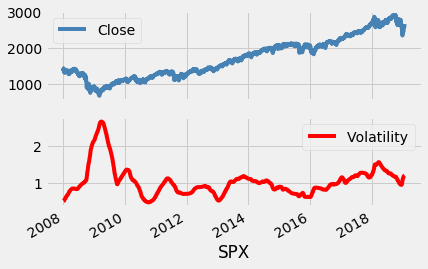

In [12]:
plt.style.use('fivethirtyeight')

spx['2008-01-01':][['Close', 'Volatility']].plot(subplots=True, color=['steelblue','red'],figsize=(6, 4))

Here we get a clear view of volatility, which spiked in 2009 but has been relatively low since.
Volatility will be essential in measuring risk. To do so, we'll use the Sharpe Ratio.

In [13]:
# add Sharpe Ratio columns to each DataFrame

# define func
def sharpe_cols():
    dfs = [aapl, amzn, googl, msft, spx, tbill]
    for df in dfs:
        df['Sharpe'] = (df.Return.rolling(252).mean() - tbill.Return.rolling(252).mean()) / df.Volatility
        df['Sharpe_MRK'] = (df.Return.rolling(252).mean() - spx.Return.rolling(252).mean()) / df.Volatility

        
# run
sharpe_cols()

# view DFs
spx.tail()

,Open,High,Low,Close,Volume,Return,Volatility,Sharpe,Sharpe_MRK
SPX,,,,,,,,,
2019-01-14,2580.3101,2589.3201,2570.4099,2582.6101,3664450000,1.813860,1.190406,0.528170,0.0
2019-01-15,2585.1001,2613.0801,2585.1001,2610.3000,3572330000,1.833308,1.193403,0.526489,0.0
2019-01-16,2614.7500,2625.7600,2612.6799,2616.1001,3863770000,1.837381,1.196217,0.524941,0.0
2019-01-17,2609.2800,2645.0601,2606.3601,2635.9600,3772270000,1.851330,1.197505,0.524047,0.0
2019-01-18,2651.2700,2675.4700,2647.5801,2670.7100,3986730000,1.875736,1.197663,0.523734,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AC5F048>,
      dtype=object)

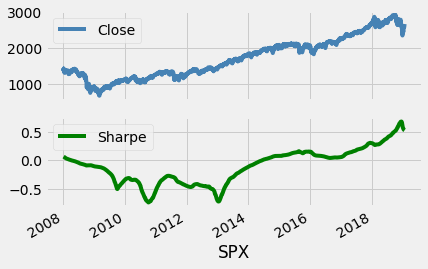

In [14]:
plt.style.use('fivethirtyeight')

spx['2008-01-01':][['Close', 'Sharpe']].plot(subplots=True, color=['steelblue','green'],figsize=(6,4))

Unlike volatility, the Sharpe Ratio is a much more nuanced curve.
This is because the Sharpe Ratio not only reflects the asset, but also the risk free rate of return (in this case, the 10 year US treasury bill).
This will show us how the asset performed (or didn't) against what is ostensibly risk-free asset.


Now that we have a way to measure our assets, let's take a look at the data. 

Text(0.5, 1.0, 'Closing Price')

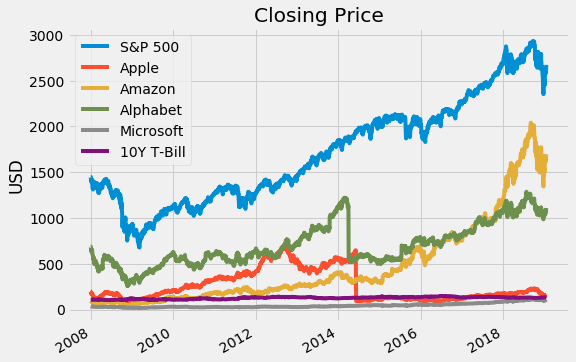

In [15]:
plt.style.use('fivethirtyeight')

spx['2008-01-01':].Close.plot(figsize=(8,6), label='S&P 500')
aapl['2008-01-01':].Close.plot(figsize=(8,6), label='Apple')
amzn['2008-01-01':].Close.plot(figsize=(8,6), label='Amazon')
googl['2008-01-01':].Close.plot(figsize=(8,6), label='Alphabet')
msft['2008-01-01':].Close.plot(figsize=(8,6), label='Microsoft')
tbill['2008-01-01':].Close.plot(figsize=(8,6), label='10Y T-Bill')

#plt.xscale('log')

plt.legend()
plt.xlabel('')
plt.ylabel('USD')
plt.title('Closing Price')

Looking at the closing price, it appears it no other asset outperformed the S&P 500.
We can also see two sharp drops in closing price of Apple and Google, it's worth noting this is because of a stock split, not some catestrophic sell-off.
This will inevitably affect our analysis, as this is not price adjusted stock data.

Let's see if we can visualize the data in another way to accomodate for this.

Text(0.5, 1.0, 'Return on Investment')

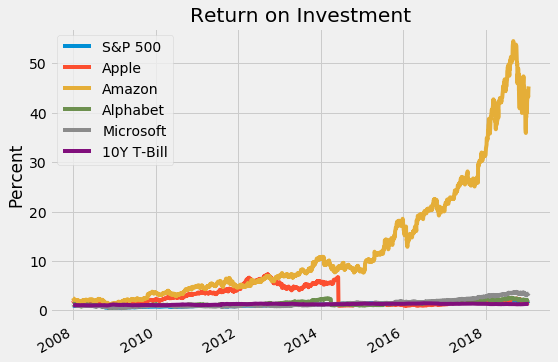

In [16]:
plt.style.use('fivethirtyeight')

spx['2008-01-01':].Return.plot(figsize=(8,6), label='S&P 500')
aapl['2008-01-01':].Return.plot(figsize=(8,6), label='Apple')
amzn['2008-01-01':].Return.plot(figsize=(8,6), label='Amazon')
googl['2008-01-01':].Return.plot(figsize=(8,6), label='Alphabet')
msft['2008-01-01':].Return.plot(figsize=(8,6), label='Microsoft')
tbill['2008-01-01':].Return.plot(figsize=(8,6), label='10Y T-Bill')

#plt.xscale('log')

plt.legend()
plt.xlabel('')
plt.ylabel('Percent')
plt.title('Return on Investment')

Looking the return of each asset, Amazon completely eclipses the entire market.
No other asset even comes close.
This could be because of the stock splits we saw earlier, but we'll certainly see this explosive growth reflected in the our analysis.

Now that we have an idea of how each stock performed, let's see if we can get an idea of how risky each asset is.

Text(0.5, 1.0, '12 Month Sharpe Ratio (RFF)')

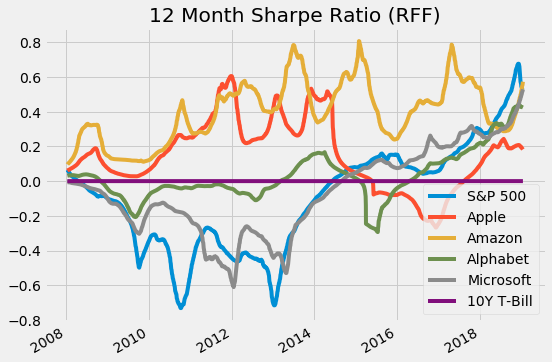

In [17]:
plt.style.use('fivethirtyeight')

spx['2008-01-01':].Sharpe.plot(figsize=(8,6), label='S&P 500')
aapl['2008-01-01':].Sharpe.plot(figsize=(8,6), label='Apple')
amzn['2008-01-01':].Sharpe.plot(figsize=(8,6), label='Amazon')
googl['2008-01-01':].Sharpe.plot(figsize=(8,6), label='Alphabet')
msft['2008-01-01':].Sharpe.plot(figsize=(8,6), label='Microsoft')
tbill['2008-01-01':].Sharpe.plot(figsize=(8,6), label='10Y T-Bill')

#plt.xscale('log')

plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('12 Month Sharpe Ratio (RFF)')

By plotting the 12 month sharpe ratios, we can see how each stock performed relative to the risk free rate.
Which every asset experienced some growth in the last decade, by measuring the Sharpe Ratio, we can see which assets OUTPERFORMED over the last decade.

Surprisingly, most of the assets had a negative Sharpe Ratio, which means they underperformed compared to the risk free rate.
Amazon is the only security that consistently outperformed the risk free rate, with Microsoft and the S&P 500 trailing.
This is unexpected, as the S&P 500 appeared to be performing strongly when we plotted the closing price.

Can we get a better measure of asset performance than the Sharpe Ratio?
Let's try modeling an adjusted Sharpe Ratio that measures asset performance not against the risk free rate, but market return.

Text(0.5, 1.0, '12 Month Sharpe Ratio (Market)')

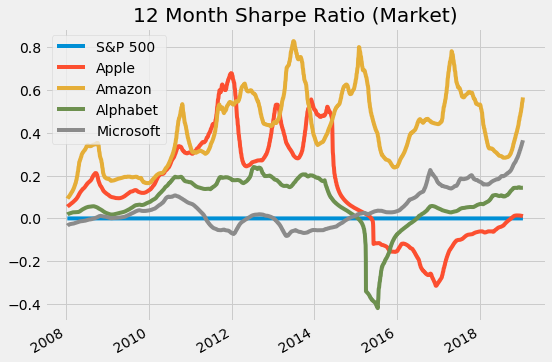

In [18]:
plt.style.use('fivethirtyeight')

spx['2008-01-01':].Sharpe_MRK.plot(figsize=(8,6), label='S&P 500')
aapl['2008-01-01':].Sharpe_MRK.plot(figsize=(8,6), label='Apple')
amzn['2008-01-01':].Sharpe_MRK.plot(figsize=(8,6), label='Amazon')
googl['2008-01-01':].Sharpe_MRK.plot(figsize=(8,6), label='Alphabet')
msft['2008-01-01':].Sharpe_MRK.plot(figsize=(8,6), label='Microsoft')

#plt.xscale('log')

plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('12 Month Sharpe Ratio (Market)')

Plotting the 12 month Sharpe Ratio of the market, we get a different idea of risk than we did when measuring it against the risk free rate.
Compared to the market return, most of our assets appear to have performed well.
Most of the values are above zero, implying our assests outperformed the market, and there aren't as many dramatic swings in as when we measured agains the risk free rate.

Let's take a look at the risk-free Sharpe Ratio of an asset compard to the Market Sharpe Ratio of an asset.
Hopefully we'll get a clear of picture of how the metrics vary.

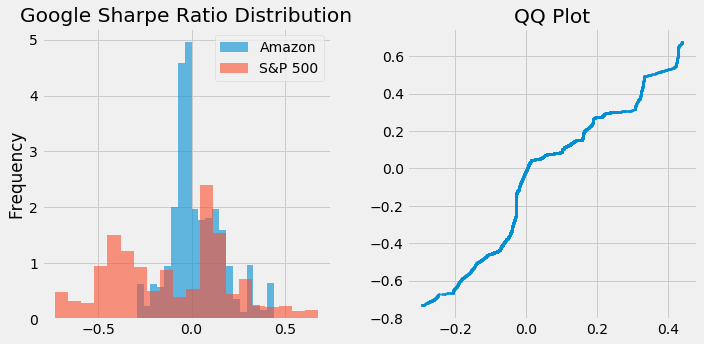

In [19]:
plt.style.use('fivethirtyeight')

plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1,2,1)

plt.hist(googl['2009-01-01':].Sharpe.dropna().sort_values(),
         bins=20, density=True, alpha=0.6, label='Amazon')
plt.hist(spx['2009-01-01':].Sharpe.dropna().sort_values(),
         bins=20, density=True, alpha=0.6, label='S&P 500')

plt.legend()
plt.ylabel('Frequency')
plt.title("Google Sharpe Ratio Distribution")


plt.subplot(1,2,2)

plt.scatter(googl['2009-01-01':].Sharpe.dropna().sort_values(),
            spx['2009-01-01':].Sharpe.dropna().sort_values(),
            s=5, zorder=10)

plt.title("QQ Plot")

plt.tight_layout()
plt.show()

Here we have a distribution of the risk-free Sharpe Ratios of Google plotted against the S&P 500.
Both distributions appear normal and follow a similar trend, clustering around 0 and tapering off as the values get more extreme.

Let's compare this to the market Sharpe Ratio.

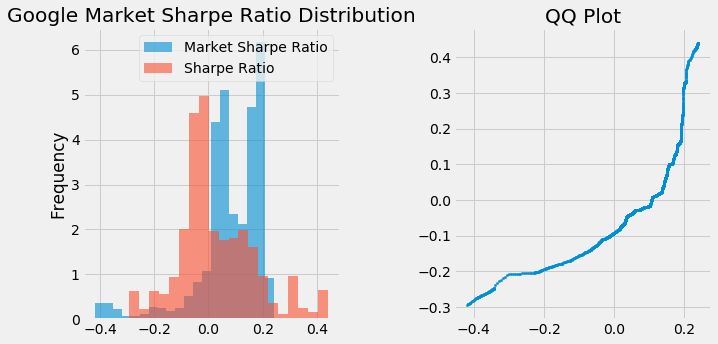

In [20]:
plt.style.use('fivethirtyeight')

plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1,2,1)

plt.hist(googl['2009-01-01':].Sharpe_MRK.dropna().sort_values(),
         bins=20, density=True, alpha=0.6, label='Market Sharpe Ratio')
plt.hist(googl['2009-01-01':].Sharpe.dropna().sort_values(),
         bins=20, density=True, alpha=0.6, label='Sharpe Ratio')

plt.legend()
plt.ylabel('Frequency')
plt.title("Google Market Sharpe Ratio Distribution")


plt.subplot(1,2,2)

plt.scatter(googl['2009-01-01':].Sharpe_MRK.dropna().sort_values(),
            googl['2009-01-01':].Sharpe.dropna().sort_values(),
            s=5, zorder=10)

plt.title("QQ Plot")

plt.tight_layout()
plt.show()

Here we can see that the Market Sharpe Ratio values skew higher than the risk-free Sharpe Ratios.
Hopefully we can use this change in the data to better understand risk.
Higher Sharpe Values imply less risk, so we can use these adjusted Sharpe Ratios to update our risk assement of Google.
In this case, the reduced risk would suggest we should increase our investment.

Let's take a look at the different Sharpe Ratios for each asset.

## Testing Our Data

Let's take a look at the data we've collected and compare our alternating Sharpe Ratios.
We can see how much the data actually differs and verify the validity of the data.

In [21]:
# count sharpe ratio values > 0 where 0 implies return == risk
print('Average 12 month Sharpe Ratio (RFF) and Market Sharpe Ratio')
print('Apple RFF:', aapl.Sharpe.mean())
print('Apple MRK:', aapl.Sharpe_MRK.mean())
print()
print('Amazon RFF:', amzn.Sharpe.mean())
print('Amazon MRK:', amzn.Sharpe_MRK.mean())
print()
print('Google RFF:', googl.Sharpe.mean())
print('Google MRK:', googl.Sharpe_MRK.mean())
print()
print('Microsoft RFF:', msft.Sharpe.mean())
print('Microsoft MRK:', msft.Sharpe_MRK.mean())
print()
print('S&P 500 RFF:', spx.Sharpe.mean())

Average 12 month Sharpe Ratio (RFF) and Market Sharpe Ratio
Apple RFF: 0.15078619740843935
Apple MRK: 0.1391702613564187

Amazon RFF: 0.3973997619876196
Amazon MRK: 0.4161671167166129

Google RFF: 0.02781512035427363
Google MRK: 0.07454510799094057

Microsoft RFF: -0.06146915371756186
Microsoft MRK: 0.047442784041321164

S&P 500 RFF: -0.10024071772332296


Most of the Market Sharpe Ratios are higher than the risk-free Sharpe Ratios, implying less risk overall.
A notable exception is with Apply stock, which has a downgraded Sharpe Ratio.
This suggests that there is more risk inherent in Apple stock than we could previously measure.

In [22]:
# count sharpe ratio values > 0 where 0 implies return == risk
print('Trading days with a Sharpe Ratio (RFF) greater than 0 (asset return greater than RFF)')
print('{} total trading days'.format(len(spx.Sharpe)))

print('Apple: ', len(aapl.query('Sharpe > 0')), 'days, ',
      (len(aapl.query('Sharpe > 0'))/len(spx.Sharpe)),'%')

print('Amazon: ', len(amzn.query('Sharpe > 0')), 'days, ',
      (len(amzn.query('Sharpe > 0'))/len(spx.Sharpe)),'%')

print('Google: ', len(googl.query('Sharpe > 0')), 'days, ',
      (len(googl.query('Sharpe > 0'))/len(spx.Sharpe)),'%')

print('Microsoft: ', len(msft.query('Sharpe > 0')), 'days, ',
      (len(msft.query('Sharpe > 0'))/len(spx.Sharpe)),'%')

print('S&P 500: ', len(spx.query('Sharpe > 0')), 'days, ',
      (len(spx.query('Sharpe > 0'))/len(spx.Sharpe)),'%')

Trading days with a Sharpe Ratio (RFF) greater than 0 (asset return greater than RFF)
3027 total trading days
Apple:  2217 days,  0.7324083250743311 %
Amazon:  2776 days,  0.9170796167822927 %
Google:  1382 days,  0.4565576478361414 %
Microsoft:  1106 days,  0.36537826230591347 %
S&P 500:  1227 days,  0.4053518334985134 %


In [23]:
# count market sharpe ratio values > 0 where 0 implies return == risk
print('Trading days with a Market Sharpe Ratio greater than 0 (asset return greater than market return)')
print('{} total trading days'.format(len(spx.Sharpe)))

print('Apple: ', len(aapl.query('Sharpe_MRK > 0')), 'days, ',
      (len(aapl.query('Sharpe_MRK > 0'))/len(spx.Sharpe)),'%')

print('Amazon: ', len(amzn.query('Sharpe_MRK > 0')), 'days, ',
      (len(amzn.query('Sharpe_MRK > 0'))/len(spx.Sharpe)),'%')

print('Google: ', len(googl.query('Sharpe_MRK > 0')), 'days, ',
      (len(googl.query('Sharpe_MRK > 0'))/len(spx.Sharpe)),'%')

print('Microsoft: ', len(msft.query('Sharpe_MRK > 0')), 'days, ',
      (len(msft.query('Sharpe_MRK > 0'))/len(spx.Sharpe)),'%')

Trading days with a Market Sharpe Ratio greater than 0 (asset return greater than market return)
3027 total trading days
Apple:  1924 days,  0.6356128179715891 %
Amazon:  2776 days,  0.9170796167822927 %
Google:  2417 days,  0.7984803435744962 %
Microsoft:  1900 days,  0.6276841757515692 %


These figures show us how many trading days each asset had a positive Sharpe ratio, or a return greater than the risk-free rate or the Market Rate.

Apply outperformed the risk-free rate 73% of the total trading days, but only outperformed the market return 63.5% of total trading days.
Google and Microsoft both saw their performance improve when we compared their return to the market rather than the risk free rate.
Amazon, on the other hand, consistently performed well across both metrics.

This information can be useful as we hope to better understand risk for future investments.

In [24]:
# count market sharpe ratio values > Sharpe ratio (market return less than RFF)
print('Trading days with a Market Sharpe Ratio greater than the RFF Sharpe Ratio (market return less than RFF)')
print('{} total trading days'.format(len(spx.Sharpe)))

print('Apple: ', len(aapl.query('Sharpe_MRK > Sharpe')), 'days, ',
      (len(aapl.query('Sharpe_MRK > Sharpe'))/len(spx.Sharpe)),'%')

print('Amazon: ', len(amzn.query('Sharpe_MRK > Sharpe')), 'days, ',
      (len(amzn.query('Sharpe_MRK > Sharpe'))/len(spx.Sharpe)),'%')

print('Google: ', len(googl.query('Sharpe_MRK > Sharpe')), 'days, ',
      (len(googl.query('Sharpe_MRK > Sharpe'))/len(spx.Sharpe)),'%')

print('Microsoft: ', len(msft.query('Sharpe_MRK > Sharpe')), 'days, ',
      (len(msft.query('Sharpe_MRK > Sharpe'))/len(spx.Sharpe)),'%')

Trading days with a Market Sharpe Ratio greater than the RFF Sharpe Ratio (market return less than RFF)
3027 total trading days
Apple:  1549 days,  0.5117277832837793 %
Amazon:  1549 days,  0.5117277832837793 %
Google:  1549 days,  0.5117277832837793 %
Microsoft:  1549 days,  0.5117277832837793 %


In [25]:
# count market sharpe ratio values < Sharpe ratio (market return greater than RFF)
print('Trading days with a Market Sharpe Ratio greater than the RFF Sharpe Ratio (market return greater than RFF)')
print('{} total trading days'.format(len(spx.Sharpe)))

print('Apple: ', len(aapl.query('Sharpe_MRK < Sharpe')), 'days, ',
      (len(aapl.query('Sharpe_MRK < Sharpe'))/len(spx.Sharpe)),'%')

print('Amazon: ', len(amzn.query('Sharpe_MRK < Sharpe')), 'days, ',
      (len(amzn.query('Sharpe_MRK < Sharpe'))/len(spx.Sharpe)),'%')

print('Google: ', len(googl.query('Sharpe_MRK < Sharpe')), 'days, ',
      (len(googl.query('Sharpe_MRK < Sharpe'))/len(spx.Sharpe)),'%')

print('Microsoft: ', len(msft.query('Sharpe_MRK < Sharpe')), 'days, ',
      (len(msft.query('Sharpe_MRK < Sharpe'))/len(spx.Sharpe)),'%')

Trading days with a Market Sharpe Ratio greater than the RFF Sharpe Ratio (market return greater than RFF)
3027 total trading days
Apple:  1227 days,  0.4053518334985134 %
Amazon:  1227 days,  0.4053518334985134 %
Google:  1227 days,  0.4053518334985134 %
Microsoft:  1227 days,  0.4053518334985134 %


Now that we have some metrics to compare, let's take a look at the significance of our data.

We'll take a look at the same metric and compare it over the two Sharpe Ratios.
We'll then conduct a t-test to verify it's significance

In [26]:
# count sharpe ratio values > 0 where 0 implies return == risk

print('Trading days with a Sharpe Ratio greater than 0 (Apple return greater than market return)')

# What is the rate of test and control?
print('Apple Control rate:', (len(aapl['2009-01-01':].query('Sharpe > 0'))/len(aapl.Sharpe)*100))
print('Apple Test rate:', (len(aapl['2009-01-01':].query('Sharpe_MRK > 0'))/len(aapl.Sharpe)*100))
print('Market rate:', (len(spx['2009-01-01':].query('Sharpe > 0'))/len(spx.Sharpe)*100))

# Are the test and control groups significantly different?
ttest_ind(aapl['2009-01-01':].Sharpe_MRK, aapl['2009-01-01':].Sharpe)

Trading days with a Sharpe Ratio greater than 0 (Apple return greater than market return)
Apple Control rate: 65.0809382226627
Apple Test rate: 55.4013875123885
Market rate: 38.38784274859597


NameError: name 'ttest_ind' is not defined

In [ ]:
# count sharpe ratio values > 0 where 0 implies return == risk

print('Trading days with a Sharpe Ratio greater than 0 (Amazon return greater than market return)')

# What is the rate of test and control?
print('Amazon Control rate:', (len(amzn['2009-01-01':].query('Sharpe > 0'))/len(amzn['2009-01-01':].Sharpe)*100))
print('Amazon Test rate:', (len(amzn['2009-01-01':].query('Sharpe_MRK > 0'))/len(amzn['2009-01-01':].Sharpe)*100))
print('Market rate:', (len(spx['2009-01-01':].query('Sharpe > 0'))/len(spx['2009-01-01':].Sharpe)*100))

# Are the test and control groups significantly different?
ttest_ind(amzn['2009-01-01':].Sharpe_MRK, amzn['2009-01-01':].Sharpe)

In [ ]:
# count sharpe ratio values > 0 where 0 implies return == risk

print('Trading days with a Sharpe Ratio greater than 0 (Google return greater than market return)')

# What is the rate of test and control?
print('Google Control rate:', (len(googl['2009-01-01':].query('Sharpe > 0'))/len(googl['2009-01-01':].Sharpe)*100))
print('Google Test rate:', (len(googl['2009-01-01':].query('Sharpe_MRK > 0'))/len(googl['2009-01-01':].Sharpe)*100))
print('Market rate:', (len(spx['2009-01-01':].query('Sharpe > 0'))/len(spx['2009-01-01':].Sharpe)*100))

# Are the test and control groups significantly different?
ttest_ind(googl['2009-01-01':].Sharpe_MRK, googl['2009-01-01':].Sharpe)

In [ ]:
# count sharpe ratio values > 0 where 0 implies return == risk

print('Trading days with a Sharpe Ratio greater than 0 (Microsoft return greater than market return)')

# What is the rate of test and control?
print('Microsoft Control rate:', (len(msft['2009-01-01':].query('Sharpe > 0'))/len(msft['2009-01-01':].Sharpe)*100))
print('Microsoft Test rate:', (len(msft['2009-01-01':].query('Sharpe_MRK > 0'))/len(msft['2009-01-01':].Sharpe)*100))
print('Market signup rate:', (len(spx['2009-01-01':].query('Sharpe > 0'))/len(spx['2009-01-01':].Sharpe)*100))

# Are the test and control groups significantly different?
ttest_ind(msft['2009-01-01':].Sharpe_MRK, msft['2009-01-01':].Sharpe)

In [ ]:
# count sharpe ratio values > 0 where 0 implies return == risk

print('Trading days with a Sharpe Ratio greater than 0 (S&P 500 return greater than market return)')

# What is the rate of test and control?
print('Control rate:', (len(spx['2009-01-01':].query('Sharpe_MRK > 0'))/len(spx['2009-01-01':].Sharpe)*100))
print('Market signup rate:', (len(spx['2009-01-01':].query('Sharpe > 0'))/len(spx['2009-01-01':].Sharpe)*100))

# Are the test and control groups significantly different?
ttest_ind(spx['2009-01-01':].Sharpe_MRK, spx['2009-01-01':].Sharpe)

We saw a change in the Sharpe Ratio for each security, except for Amazon.
This is likely due to the sharpe increase in price we were able to plot before.

We can use these changes in the Sharpe Ratio to develop two versions of an investment strategy.
We can apply these competing strategies to a simulated portfolio that will measure their performance. 

## So what does this all mean?
Let's take a look at a few sample portfolios of $10000.
One will be composed soley of the S&P 500, as if we diversely invested in the overall US stock market.
The second will be a portfolio comprised of our tech stocks: Apple, Amazon, Google, and Microsoft.
This will be our "control" portfolio that we'll use to compare performance.
The allocation of the control portfolio will be based on the average Sharpe Ratio of each stock; less risky stocks will have a higher allocation, and more risky stocks will have a smaller allocation.
The final portfolio will be our "test" portfolio.
This will be comprised of the same stocks as our control portfolio, but we'll adjust the allocation to reflect our new market Sharpe Ratio.

Each portfolio will have the same starting value, $10,000, which will grow over time based on the return of each asset.
We'll be able to compare the performance of our two Sharpe Ratios side-by-side.

In [ ]:
# create our first portfolio

# create a Position column that reflects our investment in the asset
# set Position equal to our the asset return multiplied by our initial investment
spx['Position'] = spx['Return'] * 10000

# view
spx.head()
spx.tail()

In [ ]:
# plot
spx['Position'].plot(figsize=(8,6))

This curve is functionally identical to S&P 500 closing price we plotted earlier, but it will give us a benchmark for our other portfolios to be compared to.

In [ ]:
# create our control portfolio with our RFF Sharpe Ratio

# calculate the allocation
# create a list of mean Sharpe ratios
means = (aapl.Sharpe.mean(),
      amzn.Sharpe.mean(),
      googl.Sharpe.mean(),
      msft.Sharpe.mean()
     )
# view
print(means)
sum(means)

# set the allocation as a percentage of the total Sharpe ratios
allocation = []
for mean in means:
    allocation.append(mean/sum(means))
    
print(allocation)
print(sum(allocation))

# create an Allocation column for each asset
# and calculate the Position of each asset as we did with our previous portfolio
for stock_df, allocation in zip((aapl, amzn, googl, msft),allocation):
    stock_df['Allocation1'] = stock_df['Return'] * allocation
    stock_df['Position1'] = stock_df['Allocation1']*10000
    
# create the portfolio
# concat the positions of each asset to a DataFrame
pos = [aapl['Position1'], amzn['Position1'], googl['Position1'], msft['Position1']]
port_control = pd.concat(pos, axis=1)
# rename columns
port_control.columns = ['aapl','amzn','googl','msft']

#portf_val = portf_val.dropna()

# create a column Total to track our portfolio growth
port_control['Total'] = port_control.sum(axis=1)

# view
port_control.head()
port_control.tail()

In [ ]:
port_control['Total'].plot(figsize=(8,6))

Our new control portfolio has a more exponential growth curve than S&P 500 market portfolio.
That's a good sign, it means we're experiencing a higher return.
We can see that in the total value of portfolio which is easily 3x greater than our market portfolio.

In [ ]:
## create our test portfolio with our Market Sharpe Ratio
means_MRK = (aapl.Sharpe_MRK.mean(),
      amzn.Sharpe_MRK.mean(),
      googl.Sharpe_MRK.mean(),
      msft.Sharpe_MRK.mean()
     )
print(means_MRK)
#sum(means_MRK)

allocation_MRK = []
for mean in means_MRK:
    allocation_MRK.append(mean/sum(means_MRK))
    
print(allocation_MRK)
print(sum(allocation_MRK))


for stock, allocation in zip((aapl, amzn, googl, msft),allocation_MRK):
    stock['Allocation2'] = stock['Return'] * allocation
    stock['Position2'] = stock['Allocation2']*10000
        

pos = [aapl['Position2'], amzn['Position2'], googl['Position2'], msft['Position2']]
port_test = pd.concat(pos, axis=1)
port_test.columns = ['aapl','amzn','googl','msft']

port_test['Total'] = port_test.sum(axis=1)

port_test.head()
port_test.tail()

In [ ]:
port_test['Total'].plot(figsize=(8,6))

Our test portfolio performs just like our control portfolio, exponential growth, outperforms the S&P 500, and has a similar end value.

Let's compare what we could have made if we followed these investment stategies:

In [ ]:
print('Market Potfolio (USD):', spx.Position[-1])

print('Control Portfolio (USD):', port_control.Total[-1])

print('Test Portfolio (USD):', port_test.Total[-1])

ttest_ind(port_test.Total, port_control.Total)

According to our test, our control portfolio acutally outperformed our test portfolio.
This could be becuase the Sharpe Ratio is used to minimize risk, not maximize return.
We may be developed a safer, more risk-averse portfolio with our new Sharpe Ratio, but at the sake of a more robust, growth-oriented portfolio.

This is another time to mention one of our initial observations, that the market has been in an up swing since 2009.
Volatility has been historically very low, and this is likely manifesting itself in the form of suppressed metrics like the Sharpe Ratio.

In a bull market, a growth-oriented approach is likely best for maximizing returns. In a more volatile market though, our approach of minimizing risk may prove more effective.


## Wrap Up

While we weren't able implement our findings in any potentially profitable way, we did show that these large companies are substantially less risky than the overall market. 

Our data, our findings, and our t-test all show that we fail to reject our null hypothesis.

While successful, this experiment has plenty of room for improvement.
We could conduct it again on ajusted closing prices for Apple and Google.
This would account for any possible disruptions in our analysis from the stocks splits both companies underwent.

We could also conduct this same experiment over different markets.
If a bull market had an effect on the results, we could adjust the time series to include one or more recessions and compare the results.